In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [77]:
path_input = os.path.join('00_data_input', '_nhanes')
path_output = os.path.join('03_data_output', '_nhanes')
path_demo_07 = os.path.join(path_input, 'demo_07.xls')
path_body_07 = os.path.join(path_input, 'body_07.xls')
path_demo_09 = os.path.join(path_input, 'demo_09.xls')
path_body_09 = os.path.join(path_input, 'body_09.xls')
path_demo_11 = os.path.join(path_input, 'demo_11.xls')
path_body_11 = os.path.join(path_input, 'body_11.xls')
path_demo_13 = os.path.join(path_input, 'demo_13.xls')
path_body_13 = os.path.join(path_input, 'body_13.xls')
path_demo_15 = os.path.join(path_input, 'demo_15.xls')
path_body_15 = os.path.join(path_input, 'body_15.xls')
path_result = os.path.join(path_output, 'nhanes_clean.csv')

In [54]:
df_demo_07 = pd.read_excel(path_demo_07, sheet_name='Tabelle1')
df_demo_07['year'] = 2007

In [52]:
df_demo_09 = pd.read_excel(path_demo_09, sheet_name='Tabelle1')
df_demo_09['year'] = 2009

In [53]:
df_demo_11 = pd.read_excel(path_demo_11, sheet_name='Tabelle1')
df_demo_11['year'] = 2011

In [47]:
df_demo_13 = pd.read_excel(path_demo_13, sheet_name='Tabelle1')
df_demo_13['year'] = 2013

In [55]:
df_demo_15 = pd.read_excel(path_demo_15, sheet_name='Tabelle1')
df_demo_15['year'] = 2015

In [60]:
df_demo = df_demo_07
df_demo = df_demo.append(df_demo_09)
df_demo = df_demo.append(df_demo_11)
df_demo = df_demo.append(df_demo_13)
df_demo = df_demo.append(df_demo_15)

In [62]:
df_body_07 = pd.read_excel(path_body_07, sheet_name='Tabelle1')
df_body_07['year'] = 2007

In [63]:
df_body_09 = pd.read_excel(path_body_09, sheet_name='Tabelle1')
df_body_09['year'] = 2009

In [64]:
df_body_11 = pd.read_excel(path_body_11, sheet_name='Tabelle1')
df_body_11['year'] = 2011

In [65]:
df_body_13 = pd.read_excel(path_body_13, sheet_name='Tabelle1')
df_body_13['year'] = 2013

In [66]:
df_body_15 = pd.read_excel(path_body_15, sheet_name='Tabelle1')
df_body_15['year'] = 2015

In [68]:
df_body = df_body_07
df_body = df_body.append(df_body_09)
df_body = df_body.append(df_body_11)
df_body = df_body.append(df_body_13)
df_body = df_body.append(df_body_15)

In [72]:
df_demo_extract = df_demo[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3','DMDEDUC3','DMDEDUC2','DMDMARTL',
                           'DMDHHSIZ','DMDFMSIZ','DMDHHSZA','DMDHHSZB','DMDHHSZE',
                           'DMDHRGND','DMDHREDU','DMDHRAGE','DMDHRMAR',
                           'INDHHIN2','INDFMIN2','INDFMPIR','year']]
df_demo_extract.rename(columns={'SEQN':'id',
                                'RIAGENDR':'BINARY_gender',
                                'RIDAGEYR':'YEARS_age',
                                'RIDRETH3':'CODE_race',
                                'DMDEDUC3':'CODE_education_youth',
                                'DMDEDUC2':'CODE_education_adults',
                                'DMDMARTL':'CODE_marital',
                                'DMDHHSIZ':'CNT_houshold_members',
                                'DMDFMSIZ':'CNT_family_members',
                                'DMDHHSZA':'CNT_children_age_to5',
                                'DMDHHSZB':'CNT_children_age_6to17',
                                'DMDHHSZE':'CNT_adults_older_60',
                                'DMDHRGND':'BINARY_gender_hh',
                                'DMDHREDU':'CODE_education_hh',
                                'DMDHRAGE':'YEARS_age_hh',
                                'DMDHRMAR':'CODE_marital_hh',
                                'INDHHIN2':'CODE_income_houshold',
                                'INDFMIN2':'CODE_income_family',
                                'INDFMPIR':'RATIO_poverty'},inplace=True)
df_demo_extract.info()
df_demo_extract.head()

<class 'pandas.core.frame.DataFrame'>
Index: 49727 entries, 0 to 9970
Data columns (total 20 columns):
id                        49727 non-null int64
BINARY_gender             49727 non-null int64
YEARS_age                 49727 non-null int64
CODE_race                 29727 non-null float64
CODE_education_youth      12924 non-null float64
CODE_education_adults     28705 non-null float64
CODE_marital              28705 non-null float64
CNT_houshold_members      49727 non-null int64
CNT_family_members        49727 non-null int64
CNT_children_age_to5      29727 non-null float64
CNT_children_age_6to17    29727 non-null float64
CNT_adults_older_60       29727 non-null float64
BINARY_gender_hh          49727 non-null int64
CODE_education_hh         48158 non-null float64
YEARS_age_hh              49727 non-null int64
CODE_marital_hh           48956 non-null float64
CODE_income_houshold      49012 non-null float64
CODE_income_family        49067 non-null float64
RATIO_poverty             452

,id,BINARY_gender,YEARS_age,CODE_race,CODE_education_youth,CODE_education_adults,CODE_marital,CNT_houshold_members,CNT_family_members,CNT_children_age_to5,CNT_children_age_6to17,CNT_adults_older_60,BINARY_gender_hh,CODE_education_hh,YEARS_age_hh,CODE_marital_hh,CODE_income_houshold,CODE_income_family,RATIO_poverty,year
0,41475,2,62,NaN,NaN,3.0,1.0,2,2,NaN,NaN,NaN,1,4.0,64,1.0,6.0,6.0,1.83,2007
1,41476,2,6,NaN,0.0,NaN,NaN,6,6,NaN,NaN,NaN,1,5.0,51,1.0,15.0,15.0,5.00,2007
2,41477,1,71,NaN,NaN,3.0,1.0,2,2,NaN,NaN,NaN,1,3.0,71,1.0,5.0,5.0,1.50,2007
3,41478,2,1,NaN,NaN,NaN,NaN,4,4,NaN,NaN,NaN,2,2.0,25,1.0,3.0,3.0,0.66,2007
4,41479,1,52,NaN,NaN,1.0,1.0,5,5,NaN,NaN,NaN,1,1.0,52,1.0,8.0,8.0,2.20,2007


In [73]:
df_body_extract = df_body[['SEQN','BMDSTATS','BMXHT','BMXWT','BMXBMI','BMDBMIC','year']]
df_body_extract.rename(columns={'SEQN':'id',
                                'BMDSTATS':'CODE_status',
                                'BMXHT':'CM_height',
                                'BMXWT':'KG_weight',
                                'BMXBMI':'KG_M2_bmi',
                                'BMDBMIC':'CODE_bmi_category_youth'}, inplace=True)
df_body_extract.info()
df_body_extract.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48457 entries, 0 to 9543
Data columns (total 7 columns):
id                         48457 non-null int64
CODE_status                48457 non-null int64
CM_height                  44513 non-null float64
KG_weight                  47955 non-null float64
KG_M2_bmi                  44455 non-null float64
CODE_bmi_category_youth    10218 non-null float64
year                       48457 non-null int64
dtypes: float64(4), int64(3)
memory usage: 3.0 MB


,id,CODE_status,CM_height,KG_weight,KG_M2_bmi,CODE_bmi_category_youth,year
0,41475,3,154.7,138.9,58.04,NaN,2007
1,41476,1,120.4,22.0,15.18,NaN,2007
2,41477,1,167.1,83.9,30.05,NaN,2007
3,41478,1,NaN,11.5,NaN,NaN,2007
4,41479,1,154.4,65.7,27.56,NaN,2007


In [74]:
df_body_extract = df_body_extract.drop('year', axis=1)
df_merge = df_body_extract.merge(df_demo_extract, how='inner', on='id')
df_merge.info()
df_merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47873 entries, 0 to 47872
Data columns (total 25 columns):
id                         47873 non-null int64
CODE_status                47873 non-null int64
CM_height                  43969 non-null float64
KG_weight                  47374 non-null float64
KG_M2_bmi                  43912 non-null float64
CODE_bmi_category_youth    10155 non-null float64
BINARY_gender              47873 non-null int64
YEARS_age                  47873 non-null int64
CODE_race                  28524 non-null float64
CODE_education_youth       12493 non-null float64
CODE_education_adults      27662 non-null float64
CODE_marital               27662 non-null float64
CNT_houshold_members       47873 non-null int64
CNT_family_members         47873 non-null int64
CNT_children_age_to5       28524 non-null float64
CNT_children_age_6to17     28524 non-null float64
CNT_adults_older_60        28524 non-null float64
BINARY_gender_hh           47873 non-null int64
CODE_

,id,CODE_status,CM_height,KG_weight,KG_M2_bmi,CODE_bmi_category_youth,BINARY_gender,YEARS_age,CODE_race,CODE_education_youth,...,CNT_children_age_6to17,CNT_adults_older_60,BINARY_gender_hh,CODE_education_hh,YEARS_age_hh,CODE_marital_hh,CODE_income_houshold,CODE_income_family,RATIO_poverty,year
0,41475,3,154.7,138.9,58.04,NaN,2,62,NaN,NaN,...,NaN,NaN,1,4.0,64,1.0,6.0,6.0,1.83,2007
1,41476,1,120.4,22.0,15.18,NaN,2,6,NaN,0.0,...,NaN,NaN,1,5.0,51,1.0,15.0,15.0,5.00,2007
2,41477,1,167.1,83.9,30.05,NaN,1,71,NaN,NaN,...,NaN,NaN,1,3.0,71,1.0,5.0,5.0,1.50,2007
3,41478,1,NaN,11.5,NaN,NaN,2,1,NaN,NaN,...,NaN,NaN,2,2.0,25,1.0,3.0,3.0,0.66,2007
4,41479,1,154.4,65.7,27.56,NaN,1,52,NaN,NaN,...,NaN,NaN,1,1.0,52,1.0,8.0,8.0,2.20,2007


In [78]:
df_merge.to_csv(path_result, index=False)
df_result = pd.read_csv(path_result)
df_result.info()
df_result.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47873 entries, 0 to 47872
Data columns (total 25 columns):
id                         47873 non-null int64
CODE_status                47873 non-null int64
CM_height                  43969 non-null float64
KG_weight                  47374 non-null float64
KG_M2_bmi                  43912 non-null float64
CODE_bmi_category_youth    10155 non-null float64
BINARY_gender              47873 non-null int64
YEARS_age                  47873 non-null int64
CODE_race                  28524 non-null float64
CODE_education_youth       12493 non-null float64
CODE_education_adults      27662 non-null float64
CODE_marital               27662 non-null float64
CNT_houshold_members       47873 non-null int64
CNT_family_members         47873 non-null int64
CNT_children_age_to5       28524 non-null float64
CNT_children_age_6to17     28524 non-null float64
CNT_adults_older_60        28524 non-null float64
BINARY_gender_hh           47873 non-null int64
CODE_

,id,CODE_status,CM_height,KG_weight,KG_M2_bmi,CODE_bmi_category_youth,BINARY_gender,YEARS_age,CODE_race,CODE_education_youth,...,CNT_children_age_6to17,CNT_adults_older_60,BINARY_gender_hh,CODE_education_hh,YEARS_age_hh,CODE_marital_hh,CODE_income_houshold,CODE_income_family,RATIO_poverty,year
0,41475,3,154.7,138.9,58.04,NaN,2,62,NaN,NaN,...,NaN,NaN,1,4.0,64,1.0,6.0,6.0,1.83,2007
1,41476,1,120.4,22.0,15.18,NaN,2,6,NaN,0.0,...,NaN,NaN,1,5.0,51,1.0,15.0,15.0,5.00,2007
2,41477,1,167.1,83.9,30.05,NaN,1,71,NaN,NaN,...,NaN,NaN,1,3.0,71,1.0,5.0,5.0,1.50,2007
3,41478,1,NaN,11.5,NaN,NaN,2,1,NaN,NaN,...,NaN,NaN,2,2.0,25,1.0,3.0,3.0,0.66,2007
4,41479,1,154.4,65.7,27.56,NaN,1,52,NaN,NaN,...,NaN,NaN,1,1.0,52,1.0,8.0,8.0,2.20,2007


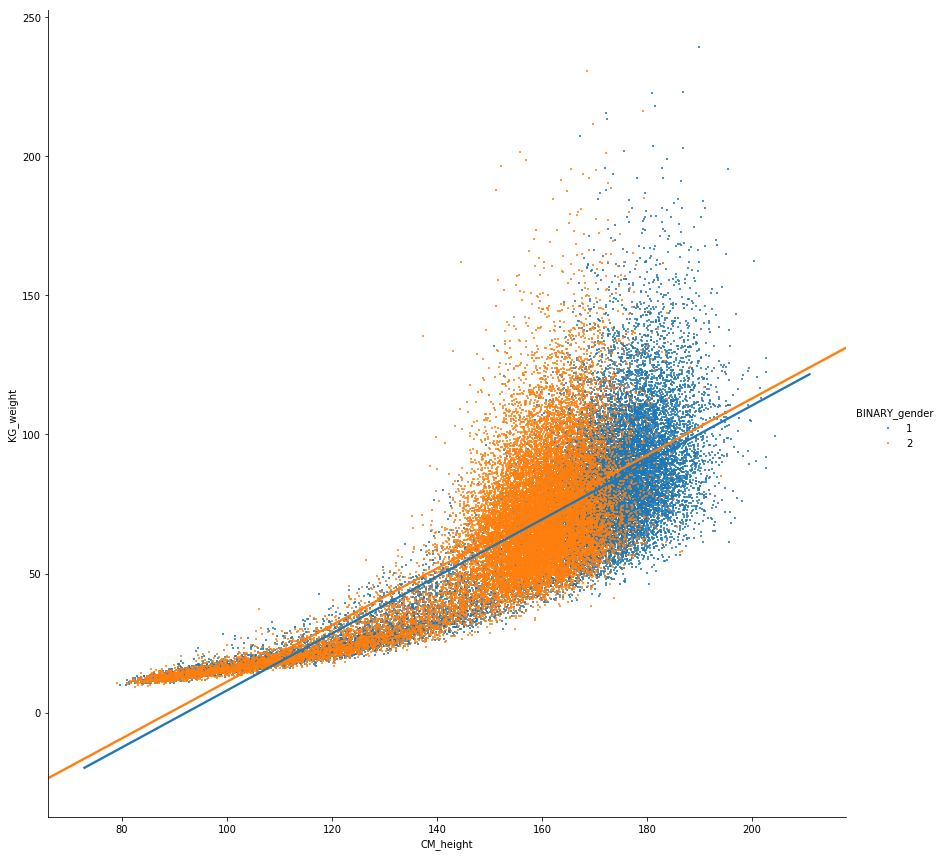

In [76]:
sns.lmplot(x='CM_height', y='KG_weight', hue='BINARY_gender', data=df_merge,
           size=12, markers='+', scatter_kws={"s": 6})

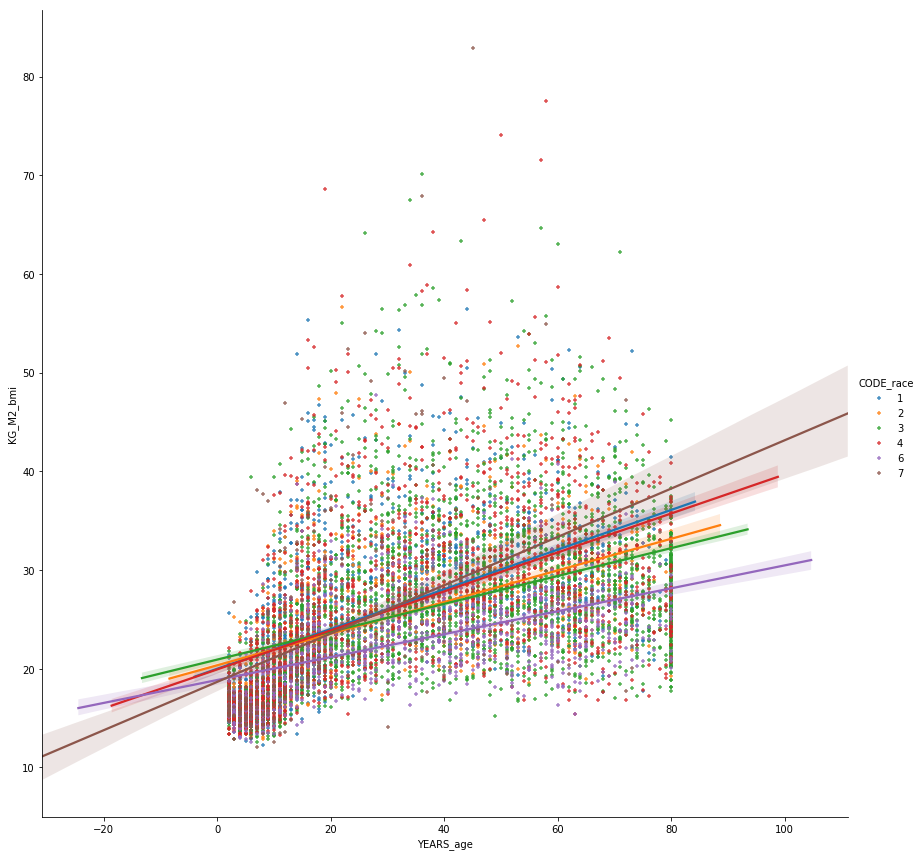

In [43]:
sns.lmplot(x='YEARS_age', y='KG_M2_bmi', hue='CODE_race', data=df_merge,
           size=12, markers='+', scatter_kws={"s": 10})